### Part 1

1.) Using a simple Fourier pricing technique (using 𝑁 = 100 intervals, and using an effective upper bound of integration of 30), price a vanilla call option assuming that the underlying share follows the Heston model dynamics. Use the parameter values from the previous section (GWP #1), as well as the following parameter values:

- $𝑣_0$ = 0.06
- κ = 9
- θ = 0.06
- 𝜌 = −0.4

In [61]:
#Importing useful libraries

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import ncx2

In [2]:
#Share Specific Information


r = 0.08 #risk-free continuously compounded interest rate 
S0 = 100 #current share price 
v0 = 0.06
kappa = 9 
theta = 0.06
sigma = 0.3
rho = -0.4

#Call Specific Information

K = 100
T = 1 
k_log = np.log(K)


#Approximation Information

t_max = 30
N = 100

In [3]:
#Characteristic function code

a = sigma**2/2

def b(u):
    return kappa - rho*sigma*1j*u

def c(u):
    return -(u**2+1j*u)/2

def d(u):
    return np.sqrt(b(u)**2-4*a*c(u))

def xminus(u):
    return (b(u)-d(u))/(2*a)

def xplus(u):
    return (b(u)+d(u))/(2*a)

def g(u):
    return xminus(u)/xplus(u)

def C(u):
    val1 = T*xminus(u)-np.log((1-g(u)*np.exp(-T*d(u)))/(1-g(u)))/a
    return r*T*1j*u + theta*kappa*val1

def D(u):
    val1 = 1-np.exp(-T*d(u))
    val2 = 1-g(u)*np.exp(-T*d(u))
    return (val1/val2)*xminus(u)

def log_char(u):
    return np.exp(C(u) + D(u)*v0 + 1j*u*np.log(S0))

def adj_char(u):
    return log_char(u-1j)/log_char(-1j)

In [4]:
delta_t = t_max/N
from_1_to_N = np.linspace(1,N,N)
t_n = (from_1_to_N-1/2)*delta_t

#Integral calculations
first_integral = sum((((np.exp(-1j*t_n*k_log)*adj_char(t_n)).imag)/t_n)*delta_t)
second_integral = sum((((np.exp(-1j*t_n*k_log)*log_char(t_n)).imag)/t_n)*delta_t)

#Call value
fourier_call_val = S0*(1/2 + first_integral/np.pi)-np.exp(-r*T)*K*(1/2 + second_integral/np.pi)
fourier_call_val

13.734895692109077

We'll price the call option under the Black-Scholes assumption to assess how effective the pricing option is under Heston dynamics.

In [5]:
# Code for analytical solution for vanilla European Call option
d_1_stock = (np.log(S0/K)+(r + sigma**2/2)*(T))/(sigma*np.sqrt(T))
d_2_stock = d_1_stock - sigma*np.sqrt(T)

analytic_callprice = S0*norm.cdf(d_1_stock)-K*np.exp(-r*(T))*norm.cdf(d_2_stock)
analytic_callprice

15.711312547892973

In [8]:
#Percentage Error

((analytic_callprice - fourier_call_val)/analytic_callprice)*100

12.579578248215492

### PART 2

2.) We will now simulate a share price path. Assume that 𝜎𝜎(𝑡𝑡𝑖𝑖,𝑡𝑡𝑖𝑖+1) = 𝜎𝜎(𝑆𝑆𝑡𝑡𝑡𝑡)𝛾𝛾−1, where σ =
0.3 and 𝛾𝛾 = 0.75. Using the formula below, simulate paths for the underlying share using 
sample sizes of 1000, 2000, …, 50000. P

In [20]:
#Additional information
gamma = 0.75
s_s = range(1000, 50001, 1000) #sample size
sim_period = 12 #Period of simulations


def future_share(price, r, d_t, sigma, gamma, s_s, value_check):
    Z = stats.norm.rvs(size=s_s)
    if value_check == True:
        sigma = sigma*(price)**(gamma-1)
    else:
        sigma = sigma*(S0)**(gamma-1)
        
    return price*np.exp((r-(sigma**2)/2)*(d_t)+(sigma)*(np.sqrt(d_t))*Z)

def share_path_generator(S0, r, T, sigma, gamma, s_s, sim_period, value_check = True):
    df = pd.DataFrame([S0]*s_s)
    for t in range(1, sim_period+1):
        df[t] = future_share(df[t-1], r, 1/sim_period, sigma, gamma, s_s, value_check)
    return df.T

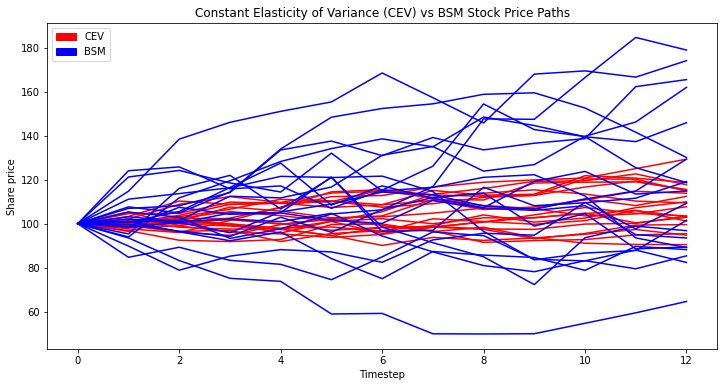

,0,1,2,3,4,5,6,7,8,9,10
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.682214,96.514953,100.444211,100.630954,100.106622,99.215643,105.333943,98.982511,98.413861,104.578892,100.044191
2,96.494671,102.437110,103.785802,101.943918,103.156427,101.037661,99.063894,100.563896,99.000600,104.709909,99.921839
3,97.017681,102.312758,108.754126,99.829432,106.602588,107.578588,102.560256,99.972685,96.203858,109.779415,98.936194
4,91.909273,99.771141,109.232006,95.742359,111.070893,105.736927,107.379745,97.920360,95.367450,109.321527,97.432188
5,95.532451,102.024869,109.982593,101.127649,110.331602,102.697845,114.467467,98.521806,93.748172,107.382473,94.664503
6,96.828391,99.214274,115.448221,102.253141,108.642706,103.141016,115.464117,96.461360,95.118220,108.562483,90.133677
7,99.135372,96.718720,113.082850,99.975914,115.113854,104.786395,111.381979,102.234364,98.452272,110.599854,93.756782
8,103.976506,91.514324,112.429971,102.660120,112.940752,107.109168,108.290303,100.993795,100.838900,106.431149,92.429176
9,100.723552,92.328663,112.886817,102.651115,113.398176,106.846007,106.830950,99.748828,102.782195,107.578150,93.516469


In [59]:
import matplotlib.patches as mpatches

T = 10
sample_size = 20

share_price_path_cev = generate_share_price_path(S0, r, T, sigma, gamma, sample_size, sim_period)
share_price_path_black_scholes = generate_share_price_path(S0, r, T, sigma, 1.0, sample_size, sim_period, varying_vol =False)

plt.figure(figsize = (12, 6))
plt.plot(share_price_path_cev, color='r')
plt.plot(share_price_path_black_scholes, color='b')
plt.xlabel("Timestep")
plt.ylabel("Share price")
red_patch = mpatches.Patch(color='r', label='CEV')
blue_patch = mpatches.Patch(color='b', label='BSM')
plt.legend(handles=[red_patch, blue_patch], loc='upper left')
plt.title("Constant Elasticity of Variance (CEV) vs BSM Stock Price Paths")
plt.show()

#Display the first 11 columns of the share price

share_price_path_cev.iloc[:, 0:11]

# Part 3

3.) Augment your code in part 2 to calculate Monte Carlo estimates, as well as the standard 
deviations for these estimates, for the price of a vanilla call option (with the same strike term 
as in Submission 1).

In [65]:
#Updating the share price size

T = 1
sample_sizes = range(1000, 50001, 1000)

share_price_paths = {}

for sample_size in sample_sizes:
    share_val = generate_share_price_path(S0, r, T, sigma_const, gamma, sample_size, timesteps, varying_vol=False) 
     
    share_price_paths[sample_size] = share_val

price_estimate = []
price_std = []
sample_size = range(1000, 50001, 1000)

for size in sample_size:
    S_Ts = share_price_paths[size].iloc[12, :]
    payoff = np.maximum(S_Ts - K, 0)
    discounted_price = np.exp(-r*T)*payoff
    price_estimate.append(discounted_price.mean())
    price_std.append(discounted_price.std()/np.sqrt(size))


z = 2 + 1/(1-gamma)
def C(t,K):
    kappa = 2*r/(sigma**2*(1-gamma)*(np.exp(2*r*(1-gamma)*t)-1))
    x = kappa*S0**(2*(1-gamma))*np.exp(2*r*(1-gamma)*t)
    y = kappa*K**(2*(1-gamma))
    return S0*(1-ncx2.cdf(y,z,x))-K*np.exp(-r*t)*ncx2.cdf(x,z-2,y)

cev_call_price = C(T, 100)
    
print("The price estimated and standard deviation by Monte Carlo with 50,000 sample size are: {:.3f} and {:.3f} respectively".format(price_estimate[-1], price_std[-1]))
print("The price calculated via CEV model using noncentral chi-squared distribution is : {:.3f}".format(cev_call_price))

The price estimated and standard deviation by Monte Carlo with 50,000 sample size are: 8.728 and 0.036 respectively
The price calculated via CEV model using noncentral chi-squared distribution is : 8.702


# Part 4

4.) Plot the Monte Carlo estimates generated in part 3 with respect to sample size, as well as 
three standard deviation error bounds around these estimates.

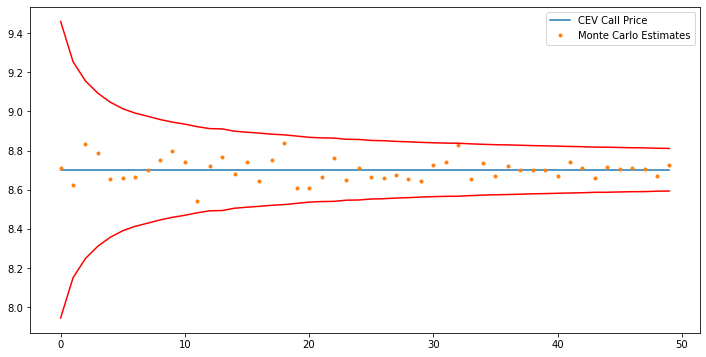

In [67]:
plt.figure(figsize = (12, 6))
plt.plot([cev_call_price]*50, label='CEV Call Price')
plt.plot(price_estimate, '.', label='Monte Carlo Estimates')
plt.plot(cev_call_price + 3*np.array(price_std), 'r')
plt.plot(cev_call_price - 3*np.array(price_std), 'r')
plt.legend()
plt.show()